In [43]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Tüm özellikleri kullanablmek için yetki yükseltme izni istedik
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
#Kullandığımız GPU hakkında geneler bilgilere ulaştık
import tensorflow as tf
tf.test.gpu_device_name()

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4138257425801424882
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1113301339559029719
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
#Gerekli olan kütüphaneleri import ettim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras 

from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Conv2D
from keras import backend as k
from keras.datasets import mnist


In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()#test ve eğitim kümelerini ayarladım

print("x_train boyut",x_train.shape)
print("x_test boyut",x_test.shape)
print("y_train boyut",y_train.shape)
print("y_test boyut",y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train boyut (60000, 28, 28)
x_test boyut (10000, 28, 28)
y_train boyut (60000,)
y_test boyut (10000,)


In [6]:
#OHE Uyguladım:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [7]:
#Gri boyutta olan resimlere ve olmayan resimlerin boyutunu değiştirdim
if k.image_data_format()=="channels_first":
    x_train=x_train.reshape(60000,1,28,28,1)
    x_test=x_test.reshape(10000,1,28,28,1)
    input_shape = (1, 28, 28)
    
else:
    x_train = x_train.reshape(60000, 28, 28, 1)
    x_test = x_test.reshape(10000, 28, 28, 1)
    input_shape = (28, 28, 1)

In [8]:
#Model tasarlama işlemi yaptım:

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [9]:
model.compile(optimizer=tensorflow.keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [32]:
model.fit(x_train,y_train,batch_size=128,epochs=40)#Modeli eğittim

Epoch 1/40
469/469 [==============================] - 8s 16ms/step - loss: 2.2076 - accuracy: 0.2444
Epoch 2/40
469/469 [==============================] - 7s 15ms/step - loss: 2.0278 - accuracy: 0.2880
Epoch 3/40
469/469 [==============================] - 7s 15ms/step - loss: 1.9138 - accuracy: 0.3321
Epoch 4/40
469/469 [==============================] - 7s 15ms/step - loss: 1.8069 - accuracy: 0.3705
Epoch 5/40
469/469 [==============================] - 8s 16ms/step - loss: 1.7054 - accuracy: 0.4088
Epoch 6/40
469/469 [==============================] - 7s 15ms/step - loss: 1.6099 - accuracy: 0.4460
Epoch 7/40
469/469 [==============================] - 7s 15ms/step - loss: 1.5457 - accuracy: 0.4701
Epoch 8/40
469/469 [==============================] - 8s 16ms/step - loss: 1.4611 - accuracy: 0.5003
Epoch 9/40
469/469 [==============================] - 8s 16ms/step - loss: 1.3955 - accuracy: 0.5244
Epoch 10/40
469/469 [==============================] - 7s 15ms/step - loss: 1.3433 - accura

In [33]:
#Loss ve Acuracy değerlerini inceledim. Daha iyi sonuçlar için epoch sayısını artırmalıyız 
score=model.evaluate(x_test,y_test,verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.18870285153388977
Accuracy:  0.9490000009536743


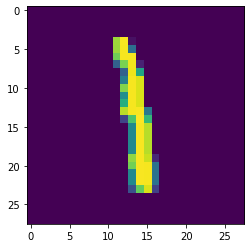

In [41]:
#Örnek bir sayıyı görüntüledim
test_image = x_test[29]
y_test[29]
plt.imshow(test_image.reshape(28,28))

In [35]:
model.save("mnist1.h5")#modeli kaydettim

In [44]:
model_test=load_model("mnist1.h5")#modeli geri çağırdım ve tahmin işlemi yaptırdım
test_data=x_test[29].reshape(1,28,28,1)
preds=model_test.predict(test_data)
print(preds)
#Aşağıda tahmin değerleri görünüyor

[[6.5152330e-05 9.8812532e-01 7.2150904e-04 1.0927081e-04 5.8153128e-05
  7.0522795e-04 3.5066979e-03 4.2304173e-04 4.4698655e-03 1.8157627e-03]]
